In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, style

style.use('ggplot')
%pylab inline

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

### Анализ имеющихся  признаков

#### Для начала посмотрим что из себя представляет датасет:

In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Из статистики в тренировочном и тестовом детасетах становится понятно, что есть опреденные проблемы с категориями Age, Fare и Cabin, где есть отсутствующие значения, при анализе надо это учитывать. 

In [8]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<ul>
<li>PassengerId - Идентификатор пассажира. Вряд ли от него можно получить какую-то пользу.</li>
<li>Survived - Целевая переменная выжил/невыжил, которую надо найти - бинарный признак.</li>
<li>Pclass - Пассажирский класс - количественный признак (1 - первый; 2 - второй; 3 - третий).</li>
<li>Name - Имя пассажира - категориальный признак.</li>
<li>Sex - Пол пассажира - категориальный признак, который можно преобразовать в бинарный.</li>
<li>Age - Возраст пассажира - количественный признак.</li>
<li>SibSp - Количество братьев/сестер на борту коробля - количественный признак.</li>
<li>Parch - Количество родителей/детей на борту коробля - количественный признак.</li>
<li>Ticket - Номер билета - категориальный признак.</li>
<li>Fare - Цена билета - количественный признак.</li>
<li>Cabin - Номера каюты - категориальный признак.</li>
<li>Embarked - Место посадки (C - Cherbourg; Q - Queenstown; S - Southampton) - категориальный признак.</li>
</ul>

### Проведем небольшой анализ данных, чтобы понять какие нужны и как их лучше преобразовать

#### Для начала посмотрим распреденение погибших и выживших:

In [9]:
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

#### Теперь посмотрим  распреденение погибших и выживших по полу, для этого преобразуем категориальный признак в количественный:

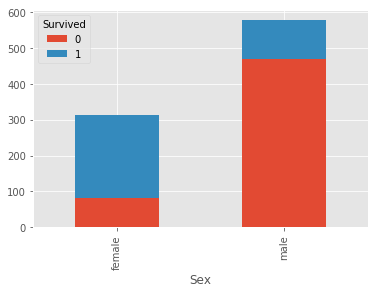

In [10]:
df.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True);

Как видно, что в процентном соотношении, женщин погибло гораздо меньше чем мужчин. Возьмем этот факт на заметку.

#### Теперь посмотрим распреденение по классу:

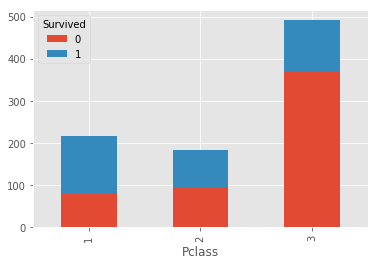

In [11]:
df.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', stacked=True);

Видно, что в 1-ом (самом дорогом и самом близким к палубе) классе выживших больше всего, тогда как в 3-м ситуация ровно противоположная.

#### Проверим, стоит ли использовать категорию Fare или лучше ориентироваться на класс:

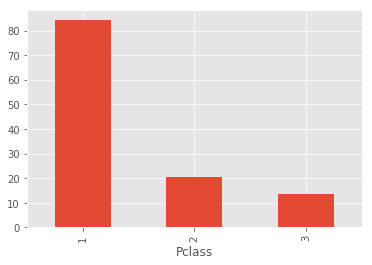

In [12]:
df.groupby('Pclass')['Fare'].mean().plot(kind='bar');

In [13]:
df.groupby('Pclass')['Fare'].max()

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

In [14]:
df[df['Fare'] > 0].groupby('Pclass')['Fare'].min()

Pclass
1     5.0000
2    10.5000
3     4.0125
Name: Fare, dtype: float64

Несмотря на то, что в среднем билеты 1-го класса стоят намного дороже чем 2-го и 3-го, но наблдается большая разница между самым дорогим и самым дешевым билетом, особенно в 1-ом классе. Пока непонятно что делать с этим признаком.

#### Теперь посмотрим на влияние наличия/отсутствия родственников:

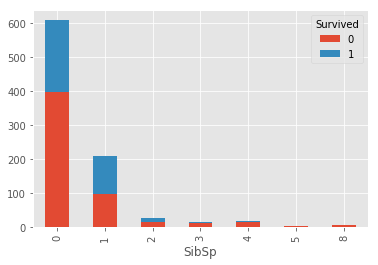

In [15]:
df.groupby(['SibSp', 'Survived']).size().unstack().plot(kind='bar', stacked=True);

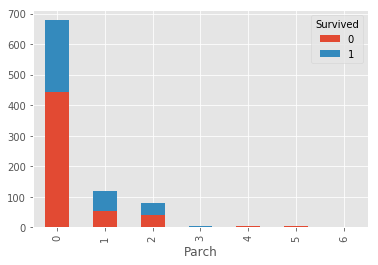

In [18]:
df.groupby(['Parch', 'Survived']).size().unstack().plot(kind='bar', stacked=True);

Как видно, наличие хотя бы одного родственника на борту несколько повышает шанс на спасение. Попробуем добвить еще и пол к этим графикам.

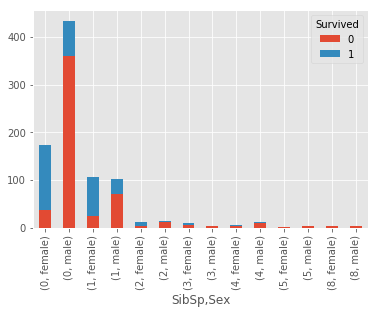

In [19]:
df.groupby(['SibSp', 'Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True);

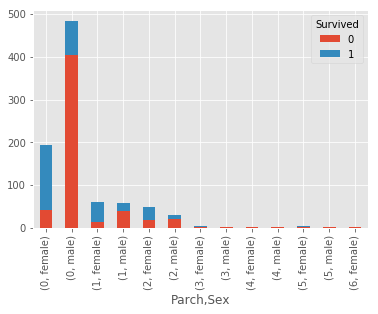

In [21]:
df.groupby(['Parch', 'Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True);

Как видно, наличие родственников на борту лучше сказывается на женщинах, чем мужчинах. Поробуем установить родственные связи, для этого выделим фамилию в отдельный признак и посмотрим, что получится.

In [22]:
df['Surname'] = df['Name'].map(lambda name: name.split(',')[0].strip())
df[(df['SibSp'] > 0) | (df['Parch'] > 0)].sort_values(['Surname']).head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.00,1,1,C.A. 2673,20.2500,NaN,S,Abbott
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.00,1,1,C.A. 2673,20.2500,NaN,S,Abbott
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.00,1,0,P/PP 3381,24.0000,NaN,C,Abelson
308,309,0,2,"Abelson, Mr. Samuel",male,30.00,1,0,P/PP 3381,24.0000,NaN,C,Abelson
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.00,1,0,7546,9.4750,NaN,S,Ahlin
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.00,0,1,392091,9.3500,NaN,S,Aks
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,Allison
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,Allison
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,Allison
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.00,1,0,350046,7.8542,NaN,S,Andersen-Jensen


Можно заметить, что наличие родственников можно определить не только по фамилий, но и (вполне возможно), что и по единому номеру билета. С другой стороны, не для всех пассажиров указаны все родственники (как для фамилии Aks или Ahlin), возможно это связано с разделением на тестовую и тренировочную выборки, поэтому это не может являться надежной категорией для исследования. С другой стороны, наличия родителя Parch и возраст, скажем, до 16-ти лет, может довольно четко дать понять, что это ребенок с родителями. Проверим это предположение.

In [23]:
df[(df['Parch'] > 0) & (df['Age'] <= 18)]['Survived'].value_counts(normalize=True)

1    0.561798
0    0.438202
Name: Survived, dtype: float64

In [24]:
df[df['Age'] <= 18]['Survived'].value_counts(normalize=True)

1    0.503597
0    0.496403
Name: Survived, dtype: float64

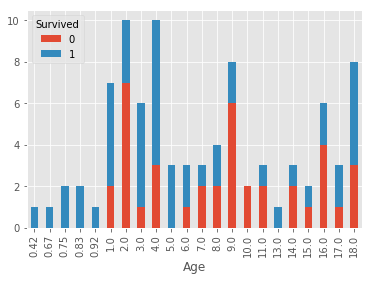

In [25]:
df[(df['Parch'] > 0) & (df['Age'] <= 18)] \
    .groupby(['Age', 'Survived']).size().unstack().plot(kind='bar', stacked=True);

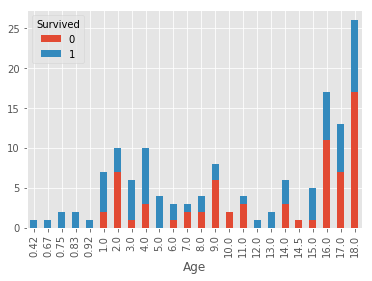

In [26]:
df[df['Age'] <= 18] \
    .groupby(['Age', 'Survived']).size().unstack().plot(kind='bar', stacked=True);

Как видно, быть ребенком с родителями сильно увеличивает шанс на спасение по сравнению с "рядовым" пассажиром, поэтому выделим это в отдельный признак.

In [27]:
df['IsChild'] = df.apply(lambda row: 1 if row['Age'] <= 18 and row['Parch'] > 0 else 0, axis=1)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,IsChild
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Palsson,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Nasser,0


In [28]:
df[df['Parch'] > 0]['Survived'].value_counts(normalize=True)

1    0.511737
0    0.488263
Name: Survived, dtype: float64

Как можно заметить, наличие родителей или детей в определенной степени также повышает вероятность выжить, поэтому будем учитывать и этот признак тоже.

#### Раз уж затронули тему возраста, то исследуем еще и распределение по нему:

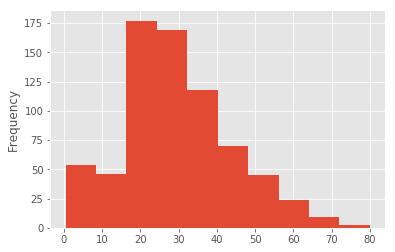

In [29]:
df['Age'].plot(kind='hist')

In [30]:
df['Age'].mean()

29.69911764705882

Так как напрямую работать с возрастом не очень удобно, то разобьем его на группы. А отсутствующие значения заменим нулями.

In [35]:
df['AgeGroup'] = df['Age']
df['AgeGroup'] = df['AgeGroup'].fillna(0).map(lambda age: int(age // 10) + 1)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,IsChild,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,0,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,0,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,0,4
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,0,6
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Palsson,1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Nasser,0,2


In [36]:
df['AgeGroup'].value_counts()

1    239
3    220
4    167
2    102
5     89
6     48
7     19
8      6
9      1
Name: AgeGroup, dtype: int64

Получились следующие группы 0 - для тех у кого возраст не указан, 1 - возраст от 0 до 9 лет, 2 - от 10 до 19 и т.д. Из них - самая многочисленная группа 3 - от 20 до 29 лет.

#### В итоге, после краткого анализа можно определиться со следующими признаками, которые могут оказать влияние на качество обучения:

<ul>
<li>Pclass - Пассажирский класс - количественный признак (1 - первый; 2 - второй; 3 - третий).</li>
<li>Age - Возраст пассажира - количественный признак.</li>
<li>Sex - Пол пассажира - бинарный признак.</li>
<li>Parch - Количество родителей/детей на борту коробля - количественный признак.</li>
<li>IsChild - Является ли пассажир ребенком - бинарный признак.</li>
<li>AgeGroup - Возрастная группа пассажира - порядковый признак в дополнение к Age.</li>
</ul>

#### Оставим еще следующие признаки, которые, теоретически, должны улучшить результат:

<ul>
<li>SibSp - Количество братьев/сестер на борту коробля - количественный признак.</li>
<li>Fare - Цена билета - количественный признак.</li>
</ul>

### Создадим Pipeline для преобразования данных в подходящую для построения модели форму 

In [37]:
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, MinMaxScaler, Imputer

In [39]:
class LabelEncoderPipelineFriendly(LabelEncoder):
    def fit(self, X, y=None):
        """this would allow us to fit the model based on the X input."""
        super(LabelEncoderPipelineFriendly, self).fit(X)
        
    def transform(self, X, y=None):
        return super(LabelEncoderPipelineFriendly, self).transform(X).reshape(-1, 1)

    def fit_transform(self, X, y=None):
        return super(LabelEncoderPipelineFriendly, self).fit(X).transform(X).reshape(-1, 1)

In [121]:
v = np.array([10] * 5)
b = np.array([3] * 5)
np.sum([np.array([1] * 5), np.divide(v, b)], axis=0).astype(int).reshape(-1, 1)

array([[4],
       [4],
       [4],
       [4],
       [4]])

In [128]:
class AgeGroup(LabelEncoder):
    def fit(self, X, y=None):
        return self
        
    def transform(self, X, y=None):
        X = np.squeeze(np.asarray(X))
        v = np.array([10] * X.shape[0])
        X = np.sum([np.array([1] * X.shape[0]), np.divide(X, v)], axis=0).astype(int)
        return X.reshape(-1, 1)

    def fit_transform(self, X, y=None):
        return self.transform(X)

In [129]:
def get_sex_col(df):
    return df[['Sex']]

def get_age_col(df):
    return df[['Age']]

pipe = make_union(*[
    make_pipeline(FunctionTransformer(get_sex_col, validate=False), LabelEncoderPipelineFriendly()),
    make_pipeline(FunctionTransformer(get_age_col, validate=False), Imputer(strategy='mean'), AgeGroup()),
])

In [130]:
pipe.fit_transform(df)

C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1, 3],
       [0, 4],
       [0, 3],
       ..., 
       [0, 3],
       [1, 3],
       [1, 4]], dtype=int64)

### Для попробуем протестировать модель на тренировочных данных

#### Помимо лишних признаков я удаляю и PassengerId, т.к. он сильно ухудшает качество предсказания для kNN.

In [ ]:
X = df.drop(([
    'PassengerId', 
    'Survived', 
    'Name', 
    'Sex', 
    'Ticket',
    'Cabin',
    'Embarked',
    'Surname',
]), axis=1)

print(X.shape)
X.head(10)

Теперь необходимо сделать нормализацию данных, это необходимо как в случае с kNN, так и с логистической регрессией.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

In [ ]:
y = df['Survived']
y.shape

#### kNN – метод ближайших соседей:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

<p>Поиск оптимальных значений параметров можно осуществить с помощью класса GridSearchCV – поиск наилучшего набора параметров, доставляющих минимум ошибке перекрестного контроля (cross-validation). По умолчанию рассматривается 3-кратный перекрестный контроль.</p>
<p>Найдем наилучшее значение k среди значений от 0 до 9:</p>

In [ ]:
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
n_neighbors_array = list(range(1, 10))
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array}, cv=10)
grid.fit(X_train, y_train)

print('grid.best_score_', grid.best_score_)
print('grid.best_params_', grid.best_params_)

In [ ]:
grid.score(X_test, y_test)

Как видно, наилучшее значение k равно 9, посчитаем accuracy_score для него.

#### Логистическая регрессия:

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
lr = LogisticRegressionCV(cv=10)
lr.fit(X_train, y_train)

In [ ]:
lr.scores_

In [ ]:
lr.scores_[1].mean(axis=0).max()

In [ ]:
lr.score(X_test, y_test)

Как видно, на этапе кросс валидации и в случае accuracy_score, kNN показывает лучшие результаты, чем логистическая регрессия. Поэтому оставим именно этот алгоритм.

### Теперь подготовим тестовую выборку

In [ ]:
df_test = df_test.fillna(df_test.median(axis=0), axis=0)

df_test['SexCode'] = df_test['Sex'].map(lambda sex: 1 if sex == 'male' else 0)

df_test['IsChild'] = df_test.apply(lambda row: 1 if row['Age'] <= 18 and row['Parch'] > 0 else 0, axis=1)

df_test['AgeGroup'] = df_test['Age']

df_test['AgeGroup'] = df_test['AgeGroup'].map(lambda age: int(age // 10) + 1)

df_test.head(5)

In [ ]:
X_prod = df_test.drop(([
    'PassengerId',  
    'Name', 
    'Sex', 
    'Ticket',
    'Cabin',
    'Embarked',
]), axis=1)

print(X_prod.shape)
X_prod.head(10)

In [ ]:
scaler = MinMaxScaler()
X_prod = scaler.fit_transform(X_prod)
X_prod

#### Создадим 2 предсказания для kNN и для логистической регрессии на случай, если первый покажет плохие результату на тестовых данных:

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X, y)

In [ ]:
y_pred = grid.predict(X_prod)

In [ ]:
y_pred

In [ ]:
df_predicted = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred})

In [ ]:
df_predicted.to_csv('sample_submission_knn.csv', sep=',', index=False)

#### Теперь тоже самое для логистической регрессии:

In [ ]:
lr = LogisticRegressionCV(cv=10)
lr.fit(X, y)

In [ ]:
y_pred = lr.predict(X_prod)

In [ ]:
y_pred

In [ ]:
df_predicted = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred})

In [ ]:
df_predicted.to_csv('sample_submission_lr.csv', sep=',', index=False)

В итоге, лучший результат для kaggle на текущий момент показан на логистической регрессии и равен 0.77511.